In [163]:
import numpy as np
import matplotlib.pyplot as plt

In [164]:
class Maze():
    def __init__(self,maze,start,end):
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1] 
        self.start_position = start   
        self.goal_position = end

    def show(self):
        plt.figure(figsize=(10,10))

        plt.imshow(self.maze,cmap="gray")
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)
        
        plt.xticks([]), plt.yticks([])

        plt.show()

        

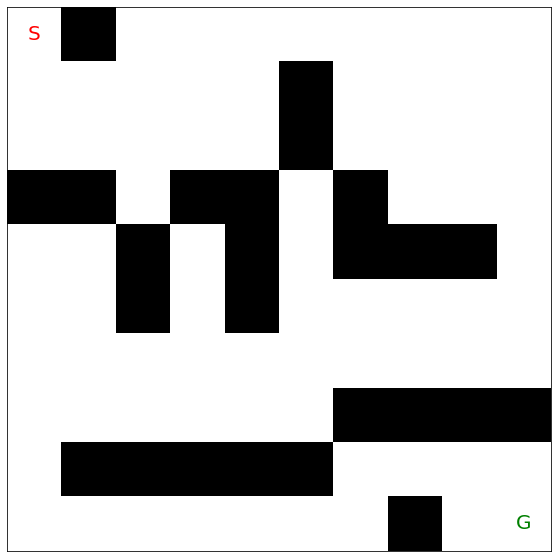

(10, 10)


In [165]:
maze = np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
    [ 1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
    [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]
])
# if you want 0 to be free space 1 to be wall you can use maze_draw = np.logical_not(maze)
wall = 0
path = 1

maze_draw = maze


maze = Maze(maze_draw,(0,0),(maze_draw.shape[1]-1,maze_draw.shape[0]-1))
maze.show()
print(maze_draw.shape)

In [166]:
actions = [(-1, 0), 
          (1, 0),   
          (0, -1), 
          (0, 1)]


class QAgent():
    def __init__(self,maze,lr =0.1,gamma = 0.9,exp_s = 1,exp_e = 0.01,num = 100):
        self.q_table = np.zeros((maze.maze_height,maze.maze_width,4))
        self.gamma = gamma
        self.lr = lr
        self.exp_s = exp_s
        self.exp_e = exp_e
        self.num = num
        

    def get_exploration_rate(self,current_episode):
  
 
        #exp_rate = self.exp_s * 0.99 ** current_episode
        exp_rate = (self.exp_e/self.exp_s) ** (current_episode/self.num)

        return exp_rate
    def get_action(self,state,current_episode):
        exp_rate = self.get_exploration_rate(current_episode)

        if np.random.rand() < exp_rate:
            return np.random.randint(4) 
        else:
            return np.argmax(self.q_table[state])
        
    def update_q_table(self, state, action, next_state, reward):

        best_next_action = np.argmax(self.q_table[next_state])


        current_q_value = self.q_table[state][action]


        new_q_value = current_q_value + self.lr * (reward + self.gamma * self.q_table[next_state][best_next_action] - current_q_value)


        self.q_table[state][action] = new_q_value  
        

In [167]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

In [168]:
def begin(agent,maze,current_episode,train = True):
    current_state = maze.start_position
    is_done = False
    ep_reward = 0
    step = 0
    path = [current_state]

    while not is_done:
        action = agent.get_action(current_state,current_episode)

        next_state = (current_state[0] + actions[action][0],current_state[1]+actions[action][1])


        if next_state[0] <0 or next_state[0] >= maze.maze_height or next_state[1] <0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == wall:
            reward = wall_penalty
            next_state = current_state
         
            
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty

        ep_reward = reward + ep_reward
        step = step +1


        if train ==   True: # Plotting the data after training is completed True
            agent.update_q_table(current_state, action, next_state, reward)

        current_state = next_state
    return ep_reward, step, path
    



In [169]:
agent = QAgent(maze)


In [170]:

def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []


    for episode in range(num_episodes):
        episode_reward, episode_step, path = begin(agent, maze, episode, train=True)


        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
        if episode%10 ==0:
            print(f"cuurent episode --- {episode}")
            print(f"current reward {episode_reward}")


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')


    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

cuurent episode --- 0
current reward -1747
cuurent episode --- 10
current reward -1085
cuurent episode --- 20
current reward -591
cuurent episode --- 30
current reward -321
cuurent episode --- 40
current reward -267
cuurent episode --- 50
current reward -161
cuurent episode --- 60
current reward -155
cuurent episode --- 70
current reward -39
cuurent episode --- 80
current reward -45
cuurent episode --- 90
current reward -65
cuurent episode --- 100
current reward 3
cuurent episode --- 110
current reward 35
cuurent episode --- 120
current reward 7
cuurent episode --- 130
current reward 17
cuurent episode --- 140
current reward 11
cuurent episode --- 150
current reward 23
cuurent episode --- 160
current reward 45
cuurent episode --- 170
current reward 37
cuurent episode --- 180
current reward 45
cuurent episode --- 190
current reward 59
cuurent episode --- 200
current reward 37
cuurent episode --- 210
current reward 55
cuurent episode --- 220
current reward 47
cuurent episode --- 230
curr

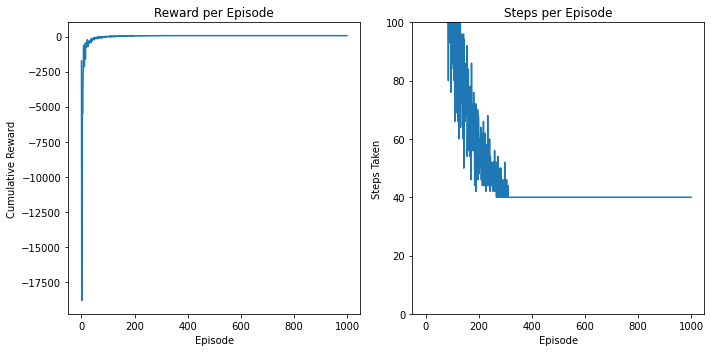

In [171]:
train_agent(agent, maze, num_episodes=1000)

In [172]:
def test_agent(agent, maze, num_episodes=1):

    episode_reward, episode_step, path = begin(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)


    if plt.gcf().get_axes():
        plt.cla()


    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (1, 1)-> (2, 1)-> (3, 1)-> (3, 0)-> (4, 0)-> (5, 0)-> (6, 0)-> (7, 0)-> (7, 1)-> (8, 1)-> (8, 2)-> (9, 2)-> (9, 3)-> (9, 4)-> (9, 5)-> (8, 5)-> (7, 5)-> (6, 5)-> (6, 6)-> (5, 6)-> (4, 6)-> (3, 6)-> (2, 6)-> (2, 7)-> (1, 7)-> (0, 7)-> (0, 8)-> (0, 9)-> (1, 9)-> (2, 9)-> (3, 9)-> (4, 9)-> (5, 9)-> (6, 9)-> (6, 8)-> (7, 8)-> (8, 8)-> (9, 8)-> Goal!
Number of steps: 40
Total reward: 61


<Figure size 432x288 with 0 Axes>

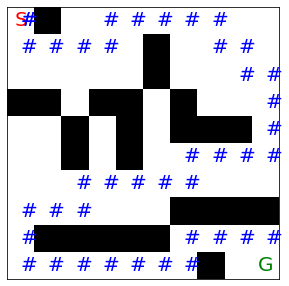

(40, 61)

In [173]:
test_agent(agent, maze, num_episodes=10000)